<a href="https://colab.research.google.com/github/martinfleichman/NeuralNetworks/blob/main/notebooks/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Google Drive session

# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import matplotlib.pyplot as plt
from keras.models import load_model
from skimage.transform import resize
import numpy as np # linear algebra

drive.mount('/content/drive', force_remount= True)

# Directory AI
path = "/content/drive/My Drive/Inteligencia Artificial/TP/TP2"

#Load Models
model = load_model(path + "/models/facialExpression_1LH.h5")
model2 = load_model(path + "/models/facialExpression_2LH.h5")
model3 = load_model(path + "/models/facialExpression_3LH.h5")
model4 = load_model(path + "/models/facialExpression_4LH.h5")
modelCNN = load_model(path + "/models/facialExpression_CNN.h5")

#Study Cases

def show_image(pic):
    photo = path + "/validateImages/" + pic
    show_img=image.load_img(photo, target_size=(200, 200))
    plt.gray()
    plt.imshow(show_img)
    plt.show() 


def predict_image(pic, model):
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    photo = path + "/validateImages/" + pic
    img = image.load_img(photo, color_mode= "grayscale", target_size=(48, 48))
    x = image.img_to_array(img)

    if model == modelCNN :
      x_pred = np.array(x).astype('float32') / 255.
      x_pred = x_pred.reshape(-1,48,48,1)
      custom = model.predict(x_pred)
    else:
      x_pred = np.array(x).astype('float32') / 255.
      x_pred = x_pred.reshape(1,2304)
      custom = model.predict(x_pred)
    
    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
        
    print('Expression Prediction:',emotion_labels[ind])

Mounted at /content/drive


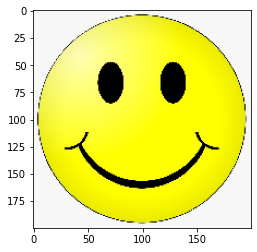

Expression Prediction: Happy
Expression Prediction: Happy
Expression Prediction: Happy
Expression Prediction: Happy
Expression Prediction: Sad


In [3]:
show_image('Smile.png')
predict_image('Smile.png', model)
predict_image('Smile.png', model2)
predict_image('Smile.png', model3)
predict_image('Smile.png', model4)
predict_image('Smile.png', modelCNN)